# SOCIAL MEDIA ANALYSIS: VISUAL SENTIMENT ANALYSIS
#### TEAM NAME: PHOENIX
#### TEAM MEMBERS: NAGA CHARITHA SADINENI, MAHIMA SANTOSHI, VENKATA SRI ATHULYA GOPISHETTY, KEERTHANA GUDAPATI
#### MODEL IMPLEMENTED: VGG16

In [1]:
import os
import pandas as pd
from shutil import copyfile
from shutil import move
from shutil import rmtree
import random

In [7]:
# mount google drive to access the dataset
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
# check if I have access to dataset
images_dir = '/content/gdrive/My Drive/Dataset/Images'
images = os.listdir(images_dir)
for img in images:
  print(img)
  break

803472484104278016-1.jpg


In [ ]:
# see the excel data format
labels_path = '/content/gdrive/My Drive/Dataset/test.xlsx'
labels_df = pd.read_excel(labels_path)
labels_df.head()

In [12]:
# get the image label from excel file
def getImageLabel(labels_df, name):
  index = labels_df.index[labels_df['Image url'] == name].tolist()
  if len(index)== 0: return
  label = labels_df['Sentiment'][index[0]]
  return label

In [13]:
# setup some pathes to use later
working_dir = "/content/gdrive/My Drive/"
org_dataset_name = "Splidata"  # this is the new folder for the dataset
org_dataset_path = os.path.join(working_dir, org_dataset_name)

In [14]:
# move the images in the dataset to new folder dataset based on its label
# the new folder dataset will contains 3 folders which are negative, positive, neutral that contains images
def prepare_dataset(images, labels_df):
   if os.path.exists(org_dataset_path):
     rmtree(org_dataset_path)
    
   classes = list(labels_df['Sentiment'].unique())
   for cls in classes:
    cls_path = os.path.join(org_dataset_path, cls)
    os.makedirs(cls_path, exist_ok=False)
   
   count = 0
   for img in images:
      label = getImageLabel(labels_df, img)
      if label is None: continue
      src = os.path.join(images_dir, img)
      des = os.path.join(org_dataset_path, label, img)
      copyfile(src, des)
      print(f'img: {count} copied!')
      count += 1

In [15]:
prepare_dataset(images, labels_df)

Streaming output truncated to the last 5000 lines.
img: 25000 copied!
img: 25001 copied!
img: 25002 copied!
img: 25003 copied!
img: 25004 copied!
img: 25005 copied!
img: 25006 copied!
img: 25007 copied!
img: 25008 copied!
img: 25009 copied!
img: 25010 copied!
img: 25011 copied!
img: 25012 copied!
img: 25013 copied!
img: 25014 copied!
img: 25015 copied!
img: 25016 copied!
img: 25017 copied!
img: 25018 copied!
img: 25019 copied!
img: 25020 copied!
img: 25021 copied!
img: 25022 copied!
img: 25023 copied!
img: 25024 copied!
img: 25025 copied!
img: 25026 copied!
img: 25027 copied!
img: 25028 copied!
img: 25029 copied!
img: 25030 copied!
img: 25031 copied!
img: 25032 copied!
img: 25033 copied!
img: 25034 copied!
img: 25035 copied!
img: 25036 copied!
img: 25037 copied!
img: 25038 copied!
img: 25039 copied!
img: 25040 copied!
img: 25041 copied!
img: 25042 copied!
img: 25043 copied!
img: 25044 copied!
img: 25045 copied!
img: 25046 copied!
img: 25047 copied!
img: 25048 copied!
img: 25049 copied!

In [16]:
classes = list(labels_df['Sentiment'].unique())
print(classes)
for cls in classes:
  cls_path = os.path.join(org_dataset_path, cls)
  print(len(os.listdir(cls_path)))

['Negative', 'Positive', 'Neutral']
10000
10000
10000


In [17]:
# create folders for train/validation/test under the new created folder Negative_Positive_Neutral 
dataset_name = f"{classes[0]}_vs_{classes[1]}_vs_{classes[2]}"
dataset_path = os.path.join(working_dir, dataset_name)
train_dir = os.path.join(dataset_path, "train")
val_dir = os.path.join(dataset_path, "validation")
test_dir = os.path.join(dataset_path, "test")

if os.path.exists(dataset_path):
   rmtree(dataset_path)

os.mkdir(dataset_path)
os.mkdir(train_dir)
os.mkdir(val_dir)
os.mkdir(test_dir)

cls_train_dirs = []
cls_val_dirs = []
cls_test_dirs = []
for cls in os.listdir(org_dataset_path):
    cls_train_dir = os.path.join(train_dir, cls)
    cls_val_dir = os.path.join(val_dir, cls)
    cls_test_dir = os.path.join(test_dir, cls)
    os.makedirs(cls_train_dir, exist_ok=False)
    os.makedirs(cls_val_dir, exist_ok=False)
    os.makedirs(cls_test_dir, exist_ok=False)
    cls_train_dirs.append(cls_train_dir)
    cls_val_dirs.append(cls_val_dir)  
    cls_test_dirs.append(cls_test_dir)  

In [18]:
# split the dataset to train/validation/test
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = os.path.join(SOURCE, filename)
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[training_length:]
    count = 0
    if TRAINING != None:
      for filename in training_set:
        this_file = os.path.join(SOURCE, filename)
        destination = os.path.join(TRAINING, filename)
        copyfile(this_file, destination)
        print(f'training_set {SOURCE}: {count} copied!')
        count += 1
    for filename in testing_set:
        this_file = os.path.join(SOURCE, filename)
        destination = os.path.join(TESTING, filename)
        if TRAINING == None:
          move(this_file, destination)
          print(f'val_set {SOURCE}: {count} moved!')
        else:
          copyfile(this_file, destination)
          print(f'testing_set {SOURCE}: {count} copied!')
        count += 1
        
split_size = .9

# split dataset to train/test
for idx in range(0, len(cls_train_dirs)):
  cls = os.path.basename(cls_train_dirs[idx])
  split_data(os.path.join(org_dataset_path, cls),  cls_train_dirs[idx],  cls_test_dirs[idx],  split_size)

split_size = .8
# split train to train/validation
for idx in range(0, len(cls_train_dirs)):
  cls = os.path.basename(cls_train_dirs[idx])
  split_data(cls_train_dirs[idx],  None,  cls_val_dirs[idx],  split_size)

Streaming output truncated to the last 5000 lines.
val_set /content/gdrive/My Drive/Negative_vs_Positive_vs_Neutral/train/Negative: 400 moved!
val_set /content/gdrive/My Drive/Negative_vs_Positive_vs_Neutral/train/Negative: 401 moved!
val_set /content/gdrive/My Drive/Negative_vs_Positive_vs_Neutral/train/Negative: 402 moved!
val_set /content/gdrive/My Drive/Negative_vs_Positive_vs_Neutral/train/Negative: 403 moved!
val_set /content/gdrive/My Drive/Negative_vs_Positive_vs_Neutral/train/Negative: 404 moved!
val_set /content/gdrive/My Drive/Negative_vs_Positive_vs_Neutral/train/Negative: 405 moved!
val_set /content/gdrive/My Drive/Negative_vs_Positive_vs_Neutral/train/Negative: 406 moved!
val_set /content/gdrive/My Drive/Negative_vs_Positive_vs_Neutral/train/Negative: 407 moved!
val_set /content/gdrive/My Drive/Negative_vs_Positive_vs_Neutral/train/Negative: 408 moved!
val_set /content/gdrive/My Drive/Negative_vs_Positive_vs_Neutral/train/Negative: 409 moved!
val_set /content/gdrive/My Dr

In [19]:
# check the number of images in each class
for idx in range(len(cls_train_dirs)):
    cls = os.path.basename(cls_train_dirs[idx])
    print(f"Number of training {cls} images {len(os.listdir(cls_train_dirs[idx]))}" )

for idx in range(len(cls_val_dirs)):
    cls = os.path.basename(cls_val_dirs[idx])
    print(f"Number of validation {cls} images {len(os.listdir(cls_val_dirs[idx]))}" )

for idx in range(len(cls_test_dirs)):
    cls = os.path.basename(cls_test_dirs[idx])
    print(f"Number of testing {cls} images {len(os.listdir(cls_test_dirs[idx]))}" )

Number of training Negative images 7200
Number of training Positive images 7200
Number of training Neutral images 7200
Number of validation Negative images 1800
Number of validation Positive images 1800
Number of validation Neutral images 1800
Number of testing Negative images 1000
Number of testing Positive images 1000
Number of testing Neutral images 1000


In [20]:
# Data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=100,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(val_dir,
                                                              batch_size=100,
                                                              class_mode='categorical',
                                                              target_size=(224, 224))

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = validation_datagen.flow_from_directory(test_dir,
                                                              batch_size=100,
                                                              class_mode='categorical',
                                                              target_size=(224, 224))

Found 21600 images belonging to 3 classes.
Found 5400 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [21]:
label_map = train_generator.class_indices
label_map

{'Negative': 0, 'Neutral': 1, 'Positive': 2}

In [22]:
# build the model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers
from tensorflow.keras.models import Model

input_shape = (224, 224, 3)

vgg16 = VGG16(input_shape=input_shape, 
                          weights='imagenet', 
                          include_top=True)

for layer in vgg16.layers:
  layer.trainable = False

vgg16.layers[1].trainable = True # the first buttom layer
vgg16.layers[2].trainable = True  # the second buttom layer
#vgg16.layers[-3].trainable = True # first dense layer
#vgg16.layers[-2].trainable = True # second desnse layer
vgg_output = vgg16.layers[-2].output
output = layers.Dense(units=3, activation='softmax')(vgg_output) # output layer

model = Model(vgg16.input, output)
model.summary()

553467904/553467096 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [23]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.0001), 
             loss='categorical_crossentropy',
             metrics=['acc'])
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=10, 
                    verbose=1)

Epoch 1/10
216/216 [==============================] - 2502s 11s/step - loss: 1.3022 - acc: 0.3597 - val_loss: 1.0888 - val_acc: 0.3950
Epoch 2/10
216/216 [==============================] - 713s 3s/step - loss: 1.0770 - acc: 0.4127 - val_loss: 1.0713 - val_acc: 0.4120
Epoch 3/10
216/216 [==============================] - 723s 3s/step - loss: 1.0631 - acc: 0.4314 - val_loss: 1.0616 - val_acc: 0.4356
Epoch 4/10
216/216 [==============================] - 706s 3s/step - loss: 1.0565 - acc: 0.4419 - val_loss: 1.0573 - val_acc: 0.4406
Epoch 5/10
216/216 [==============================] - 700s 3s/step - loss: 1.0470 - acc: 0.4575 - val_loss: 1.0602 - val_acc: 0.4326
Epoch 6/10
216/216 [==============================] - 709s 3s/step - loss: 1.0469 - acc: 0.4530 - val_loss: 1.0528 - val_acc: 0.4535
Epoch 7/10
216/216 [==============================] - 707s 3s/step - loss: 1.0424 - acc: 0.4589 - val_loss: 1.0539 - val_acc: 0.4372
Epoch 8/10
216/216 [==============================] - 704s 3s/step 

In [24]:
loss, accuracy = model.evaluate(test_generator) 
print(f'Test accuracy : {accuracy}') # print the test accuracy

30/30 [==============================] - 258s 9s/step - loss: 1.0538 - acc: 0.4527
Test accuracy : 0.45266667008399963


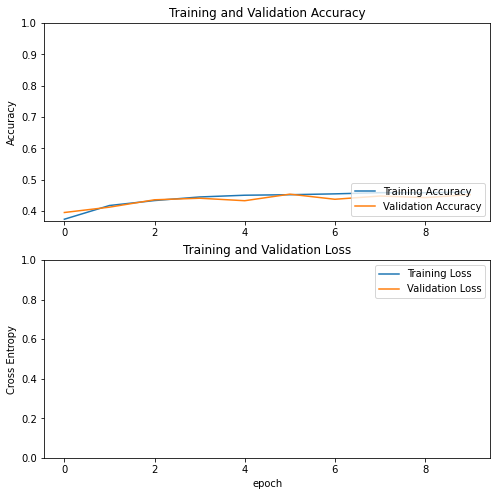

In [25]:
# plot the train and validation graphs
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [1]:
# test new image
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  preds = model.predict(x)
  labels = list(label_map.keys())
  if preds[0][0]> 0.5:
    print(f"{fn} is a {labels[0]}")
  elif preds[0][1]> 0.5:
    print(f"{fn} is a {labels[1]}")
  else:
    print(f"{fn} is a {labels[2]}")

Saving image2.jpg to image2.jpg


NameError: ignored